Author: Jose Caloca


Date: 13/10/2023

# Load Packages

In [1]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.figure_factory import create_distplot
import plotly.io as pio
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df_credit = pd.read_csv("./data/german_credit_data.csv", index_col="Unnamed: 0")

- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text - little, moderate, quite rich, rich)
- Checking account (numeric, in DM - Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others
- Risk (Value target - Good or Bad Risk)

In [4]:
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
#Looking unique values
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


# Data Visualisation

In [6]:
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
    name='Good credit',
    marker=dict(color='blue')
)

trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
    name='Bad credit',
    marker=dict(color='red')
)

data = [trace0, trace1]

layout = go.Layout(
    title='Target Variable Distribution',
    width=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    yaxis=dict(title='Count'),
    xaxis=dict(title='Risk Variable'),
    template="simple_white"
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [7]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit",
    marker=dict(color='blue')
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit",
    marker=dict(color='red')
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age",
    marker=dict(color='gray')
)

#Creating the grid
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig.update_layout(
    title='Age Distribution',
    template="simple_white",
    width=1000,
    height=600,
    margin=dict(l=50, r=50, t=80, b=80),
    showlegend=True,
    bargap=0.05,
    xaxis=dict(title='Age'),
    yaxis=dict(title='Probability')
)

fig.show()


### Creating an categorical variable to handle with the Age variable

In [8]:
#Let's look the Credit Amount column
interval = (18, 35, 60, 120)

cats = ['Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit['Age'], interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [9]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='blue'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='red'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group',
    title='Credit Amount by Age Category',
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="#7f7f7f"
    ),
    margin=dict(
        l=30,
        r=30,
        b=30,
        t=80
    ),
    showlegend=True,
    template="simple_white",
    width=1000
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [10]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit',
    marker=dict(
        color='blue' # blue color
    )
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit",
    marker=dict(
        color='red' # red color
    )
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition',
    width=1000,
    height=500,
    template="simple_white",
    xaxis=dict(
        title='Housing Type',
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title='Count',
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    font=dict(
        family='Arial, sans-serif',
        size=14,
        color='black'
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [11]:
# Create histogram traces
trace1 = go.Histogram(x=df_good['Credit amount'], name='Good Credit', marker=dict(color='blue'), nbinsx=50)
trace2 = go.Histogram(x=df_bad['Credit amount'], name='Bad Credit', marker=dict(color='red'), nbinsx=50)

# Define layout
layout = go.Layout(
    title='Credit Amount Frequency Distribution',
    xaxis=dict(title='Credit Amount'),
    yaxis=dict(title='Count'),
    width=1000,
    template="simple_white"
)

# Create figure object
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Display the plot
fig.show()


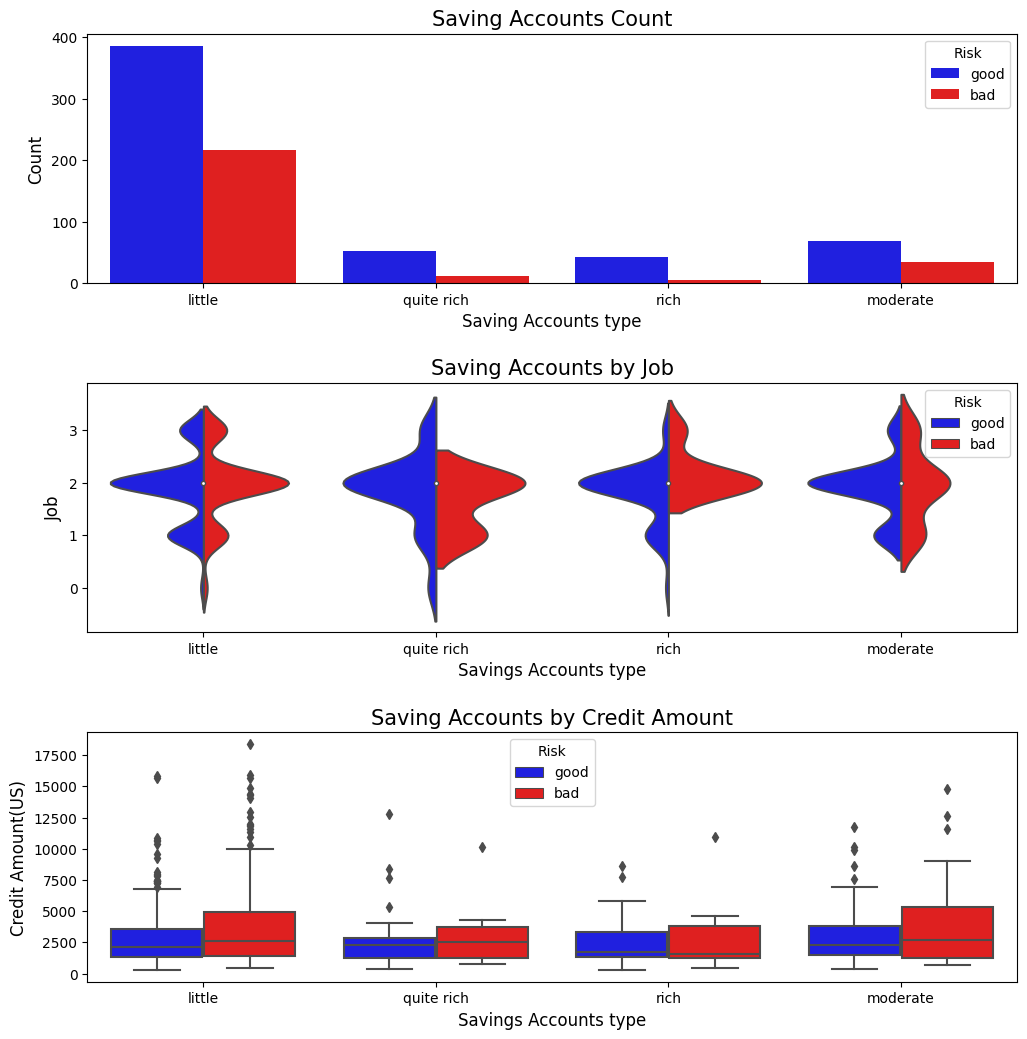

In [12]:
fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=df_credit, palette={"good": "blue", "bad": "red"}, 
              ax=ax[0],hue="Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=df_credit, palette={"good": "blue", "bad": "red"}, 
               hue = "Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g2 = sns.boxplot(x="Saving accounts", y="Credit amount", data=df_credit, ax=ax[2],
            hue = "Risk",palette={"good": "blue", "bad": "red"})
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()


In [13]:
# First plot
trace0 = go.Bar(
    x=df_credit[df_credit['Risk'] == 'good']['Checking account'].value_counts().index.values,
    y=df_credit[df_credit['Risk'] == 'good']['Checking account'].value_counts().values,
    name='Good Credit Distribution',
    marker=dict(color='#636EFA')
)

# Second plot
trace1 = go.Bar(
    x=df_credit[df_credit['Risk'] == 'bad']['Checking account'].value_counts().index.values,
    y=df_credit[df_credit['Risk'] == 'bad']['Checking account'].value_counts().values,
    name='Bad Credit Distribution',
    marker=dict(color='#EF553B')
)

data = [trace0, trace1]

layout = go.Layout(
    title='Checking Accounts Distribution',
    xaxis=dict(title='Checking Accounts Name'),
    yaxis=dict(title='Count'),
    barmode='group',
    width=1000,
    template="simple_white",
    font=dict(family='Arial, sans-serif', size=14, color='#7f7f7f')
)

fig = go.Figure(data=data, layout=layout)

fig.show()


In [14]:
# Calculate the count of each risk and sex combination
df_counts = df_credit.groupby(['Risk', 'Sex']).size().reset_index(name='count')

# Define colors based on gender and credit risk
color_mapping = {
    ('bad', 'male'): '#FF7F7F',
    ('bad', 'female'): '#FFB6B6',
    ('good', 'male'): '#7FBFFF',
    ('good', 'female'): '#B6E2FF'
}

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='male', 
           x=df_counts[df_counts['Sex'] == 'male']['Risk'], 
           y=df_counts[df_counts['Sex'] == 'male']['count'], 
           marker=dict(color=[color_mapping[(risk, 'male')] for risk in df_counts[df_counts['Sex'] == 'male']['Risk']]),
           showlegend=False),  # Set showlegend to False to hide the legend
    go.Bar(name='female', 
           x=df_counts[df_counts['Sex'] == 'female']['Risk'], 
           y=df_counts[df_counts['Sex'] == 'female']['count'], 
           marker=dict(color=[color_mapping[(risk, 'female')] for risk in df_counts[df_counts['Sex'] == 'female']['Risk']]),
           showlegend=False),  # Set showlegend to False to hide the legend
])

# Update layout
fig.update_layout(title='Credit Risk by Sex',
                  xaxis_title='Risk',
                  yaxis_title='Count',
                  barmode='stack',
                  width=800,
                  template="simple_white")

# Show the plot
fig.show()


In [15]:
# Create a grouped box plot
fig = px.box(df_credit, x='Sex', y='Credit amount', color='Risk', points='all',
             category_orders={'Sex': ['male', 'female'], 'Risk': ['good', 'bad']}, 
             color_discrete_map={'good':'blue', 'bad':'red'})

# Update layout
fig.update_layout(title='Credit Amount Distribution by Sex and Risk',
                  xaxis_title='Sex',
                  yaxis_title='Credit Amount',
                  legend_title='Risk',
                  boxmode='group',
                  width=1000,
                  template="simple_white")

# Show the plot
fig.show()


In [16]:
# Calculate value counts for each housing type and credit risk for good credit
df_good = df_credit[df_credit['Risk'] == 'good']
good_counts = df_good.groupby(['Housing', 'Sex']).size().reset_index(name='count')

# Calculate value counts for each housing type and credit risk for bad credit
df_bad = df_credit[df_credit['Risk'] == 'bad']
bad_counts = df_bad.groupby(['Housing', 'Sex']).size().reset_index(name='count')

# Create the bar charts
trace0 = go.Bar(
    x=good_counts[good_counts['Sex'] == 'male']['Housing'],
    y=good_counts[good_counts['Sex'] == 'male']['count'],
    name='Good (male)',
    marker_color='blue'
)
trace1 = go.Bar(
    x=good_counts[good_counts['Sex'] == 'female']['Housing'],
    y=good_counts[good_counts['Sex'] == 'female']['count'],
    name='Good (female)',
    marker_color='lightblue'
)
trace2 = go.Bar(
    x=bad_counts[bad_counts['Sex'] == 'male']['Housing'],
    y=bad_counts[bad_counts['Sex'] == 'male']['count'],
    name='Bad (male)',
    marker_color='red'
)
trace3 = go.Bar(
    x=bad_counts[bad_counts['Sex'] == 'female']['Housing'],
    y=bad_counts[bad_counts['Sex'] == 'female']['count'],
    name='Bad (female)',
    marker_color='lightcoral'
)

# Create the figure
data = [trace0, trace1, trace2, trace3]

layout = go.Layout(
    title='Housing Distribution by Credit Risk and Sex',
    template="simple_white"
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [17]:
from scipy.stats import chi2_contingency

# Create a contingency table of 'Sex' and 'Risk'
contingency_table = pd.crosstab(df_credit['Sex'], df_credit['Risk'])

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-squared test statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.2f}")
print("Expected frequencies:")
print(expected)

# Display dependencies between subclasses
for sex in contingency_table.index:
    for risk in contingency_table.columns:
        expected_count = expected[contingency_table.index.get_loc(sex)][contingency_table.columns.get_loc(risk)]
        observed_count = contingency_table.loc[sex, risk]
        print(f"{sex} and {risk}: {observed_count} (expected {expected_count:.2f})")


Chi-squared test statistic: 5.35
P-value: 0.02
Expected frequencies:
[[ 93. 217.]
 [207. 483.]]
female and bad: 109 (expected 93.00)
female and good: 201 (expected 217.00)
male and bad: 191 (expected 207.00)
male and good: 499 (expected 483.00)


The results of the chi-squared test show that there is a statistically significant association between the variables 'Sex' and 'Risk' (chi-squared test statistic = 5.35, p-value = 0.02). This suggests that the likelihood of having good or bad credit is dependent of the individual's sex.

The expected frequencies table shows the expected number of individuals in each category under the assumption of independence between the variables 'Sex' and 'Risk'. The observed frequencies table shows the actual number of individuals in each category. By comparing the observed and expected frequencies, we can see that there are some notable differences.

The dependencies between subclasses show the observed and expected frequencies for each combination of 'Sex' and 'Risk'. For example, we can see that there were 109 females with bad credit (observed count), whereas the expected count based on the assumption of independence was 93. Similarly, there were 499 males with good credit (observed count), whereas the expected count based on the assumption of independence was 483.

Overall, these results suggest that there is a relationship between an individual's sex and their likelihood of having good or bad credit, which is not accounted for by chance alone. However, further analysis would be required to determine the nature and strength of this relationship.
_______________________